## PROBLEM STATEMENT

It is a georgian used car price dataset. I took this data set from kaggle. This data set has 19237 rows and 18 columns.

Our goal is to predict the price of the car based on the features of the car. We will use machine learning to predict the price of the car.

On seeing the data, we can see that the data is not clean. We have to clean the data first.

We have to find the best model for our car price prediction. Our aim to get R2 score of 0.75 or more and MAE less than 5000.

We will use Linear Regression, Support Vector Regressor, Decision tree, Random forest, and Xgboost. 

We will fine tune our best models among them and get the final model.

## DATA LOADING AND DESCRIPTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert

In [4]:

car_data = pd.read_csv("D:Local Disk/Downloads/car_price_prediction.csv")
car_data.sample(5)


ID  Price  Levy Manufacturer      Model  Prod. year Category  \
12292  45811132  14583  1058        LEXUS     RX 450        2012     Jeep   
11304  45810779  21326     -   MITSUBISHI  Outlander        2012     Jeep   
15987  45770961    549   585       TOYOTA      Prius        2013     Jeep   
8466   45788676   4000     -   VOLKSWAGEN      Vento        1994    Sedan   
12864  45801569   7997     -   VOLKSWAGEN  Passat B5        2003    Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
12292              Yes    Hybrid           3.5  257072 km        6.0   
11304               No    Petrol     2.4 Turbo  128000 km        4.0   
15987              Yes    Hybrid           1.8  298248 km        4.0   
8466                No    Petrol           1.8  182000 km        4.0   
12864              Yes    Petrol     1.8 Turbo  139000 km        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
12292     Automatic          4x4  04-May  Left wheel    Grey       12  
11304     Automatic          4x4  04-May  Left wheel  Silver       16  
15987     Automatic        Front  04-May  Left wheel   White       12  
8466         Manual        Front  04-May  Left wheel    Blue        0  
12864     Tiptronic        Front  04-May  Left wheel   Black        8

In [5]:
print(car_data.info())
print("--"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
print(car_data.describe())
print("--"*50)
print(car_data.columns)
print("--"*50)
print(car_data.shape)

                 ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000
----------------------------------------------------------------------------------------------------
Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Whe

In [7]:
car_data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

After looking the data, I have found some impurities in the data. These impurities are:
1. Levy has a lot of row filled with "-".
2. Price has a very large outlier. we have to delete it.
3. Engine Volume has some impure data .i.e. 3.5 Turbo . we have to remove that Turbo from there and then convert its dtype to float.
4. Mileage also has some impurity like 200000 Km , we have to remove Km from there and then convert its dtype to float.
5. Model and Manufacturer columns have a large number of unique data so we need to bin it . but we will do it later in feature engineering part.
6. Doors have values like: 04-May and 02-Mar. which is error so we will change them in 04-05 and 02-03.


## DATA PREPROCESSING

In this part, we are going to do some cleaning of data. 

That is, Treatment of problems that we have figured out in our DIAGONOSTIC EDA. 

After cleaning them, we will change the dtype of Levy, Mileage and Engine volume to float32.

We will also delete duplicates here. 

### Cleaning the data

In [ ]:

for i in range(19237):
    if car_data["Levy"][i]== "-":
        car_data["Levy"][i]= np.nan
    if "km" in car_data["Mileage"][i]:
        car_data["Mileage"][i]=  car_data["Mileage"][i][:-2]
    if "Turbo" in car_data["Engine volume"][i]:
        car_data["Engine volume"][i]= car_data["Engine volume"][i][:-5]
    if car_data["Doors"][i]=="04-May":
        car_data["Doors"][i]= "04-05"
    elif car_data["Doors"][i]=="02-Mar":
        car_data["Doors"][i]="02-03"



### Converting the data types

In [9]:
car_data["Mileage"] = car_data["Mileage"].astype('float32')
car_data["Engine volume"] = car_data["Engine volume"].astype('float32')
car_data["Levy"] = car_data["Levy"].astype('float32')
car_data["Airbags"] = car_data["Airbags"].astype('int32')
car_data["Prod. year"] = car_data["Prod. year"].astype('int32')
car_data["Price"] = car_data["Price"].astype('int32')
car_data["ID"] = car_data["ID"].astype('int32')
car_data["Cylinders"] = car_data["Cylinders"].astype('int32')


In [10]:
car_data.dtypes

ID                    int32
Price                 int32
Levy                float32
Manufacturer         object
Model                object
Prod. year            int32
Category             object
Leather interior     object
Fuel type            object
Engine volume       float32
Mileage             float32
Cylinders             int32
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int32
dtype: object

### DROPPING THE DUPLICATES

In [11]:
car_data.duplicated().sum()

np.int64(313)

In [12]:
car_data.drop_duplicates(inplace=True)

In [13]:
car_data.duplicated().sum()

np.int64(0)

### OUTLIER HANDLING

So, we have tried a lots of way of handling the outliers. We will discuss here what I faced in different methods of outlier handling. We tried the following methods:
1. Deleting the outliers using IQR method with bound= bound +- 1.5 IQR:- for this we have to delete about 4500 rows out of 19000 rows. Which is a large amount of data. we have run the model after deleting them and we gained a max score of 0.76 r2 score.
2. Capping the outliers using IQR Method as above: This method help us in preserving the data. But not so effective as our r2 score fall to about 0.60 r2 score at max.
3. Deleting the outliers using IQR method with bound= bound +- 3 IQR:-  This method had preserved the data as we have to just delete less than 1000 rows and also we preserved our model's max r2 score to 0.755. i found this as a great deal so far.


In [14]:
cols=["Price", "Prod. year",'Mileage',"Levy"]
for col in cols:
    q1=car_data[col].quantile(0.25)
    q3=car_data[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-3*IQR
    upper_bound=q3+3*IQR
    print("Number of Outliers:",car_data[ (car_data[col]<lower_bound) | (car_data[col]>=upper_bound) ].shape[0])
    car_data.drop(car_data[(car_data[col]<lower_bound) | (car_data[col]>=upper_bound)].index, inplace=True)


car_data.drop(car_data[(car_data["Engine volume"]>=7.5)].index, inplace=True)

Number of Outliers: 301
Number of Outliers: 148
Number of Outliers: 203
Number of Outliers: 146


## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

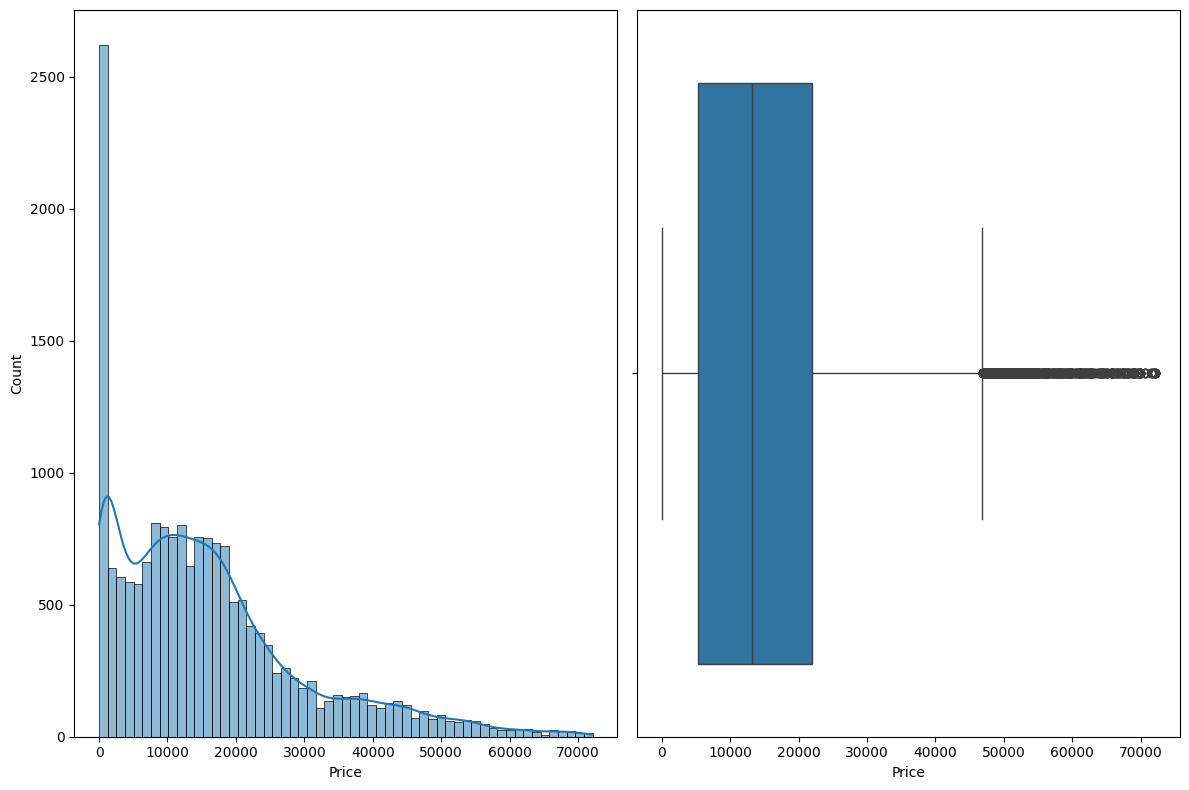

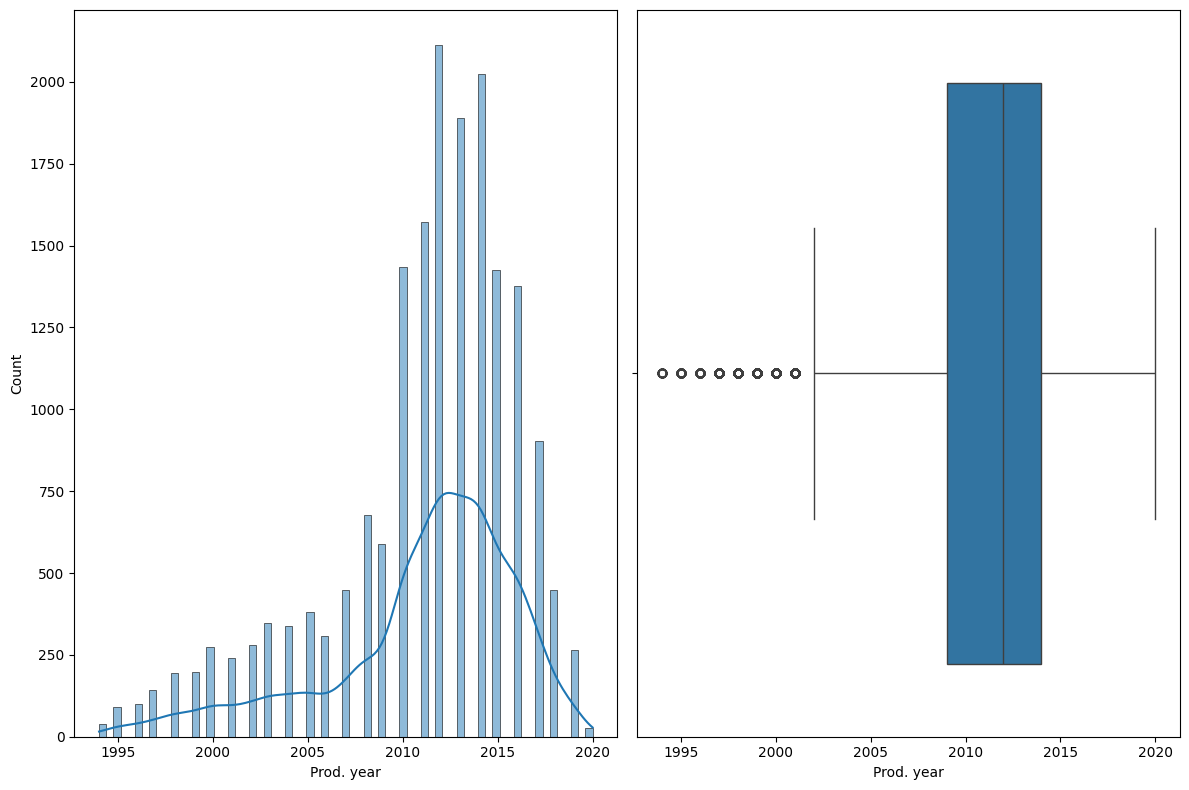

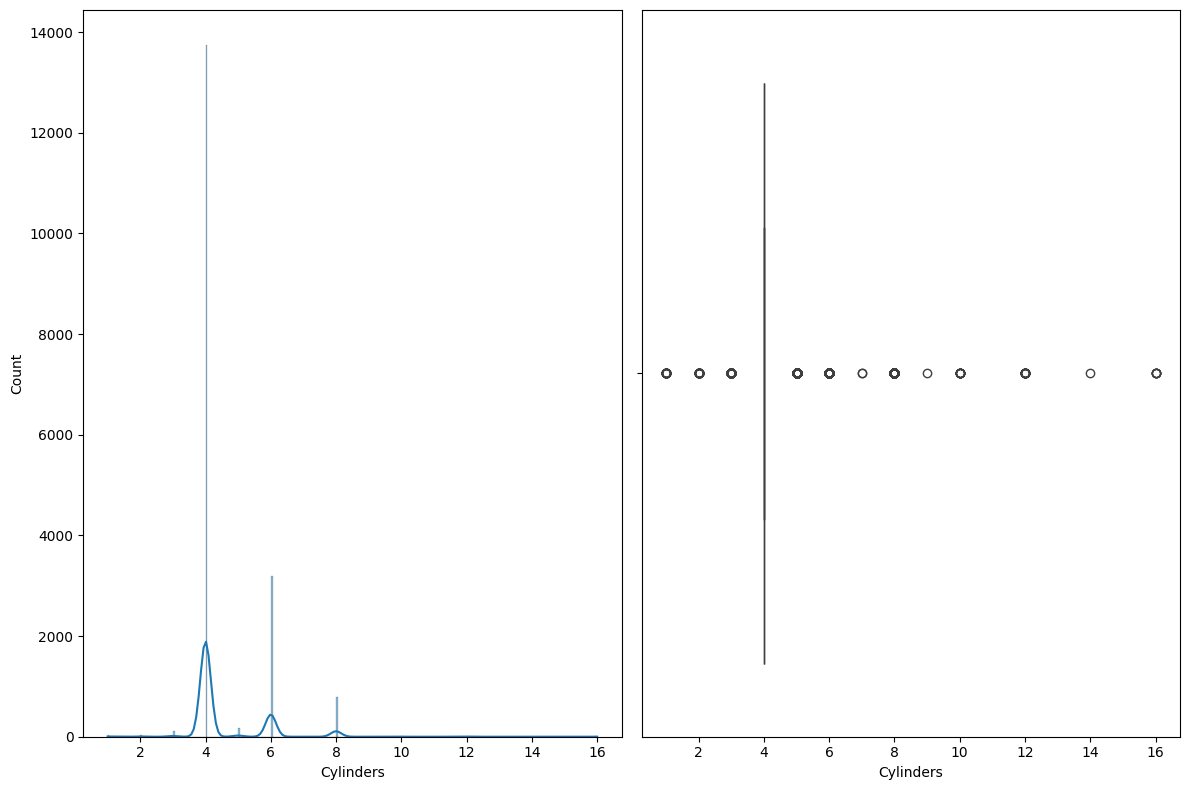

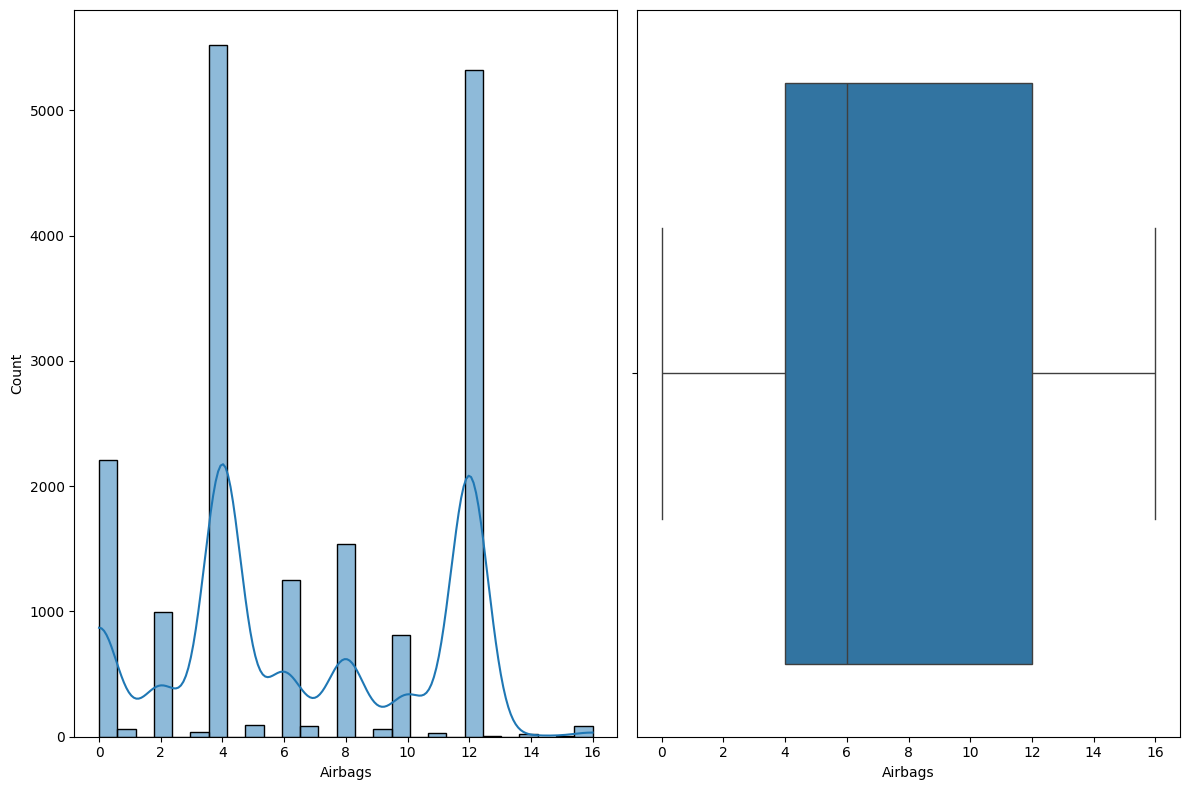

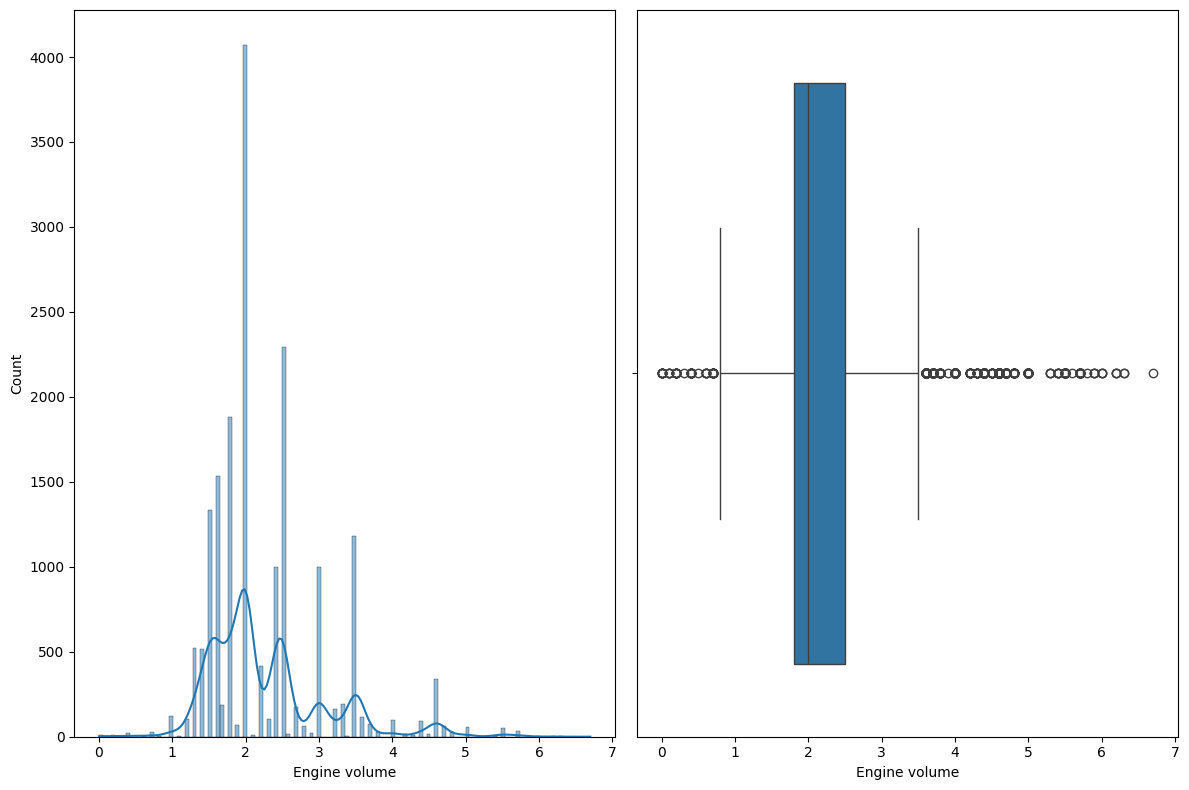

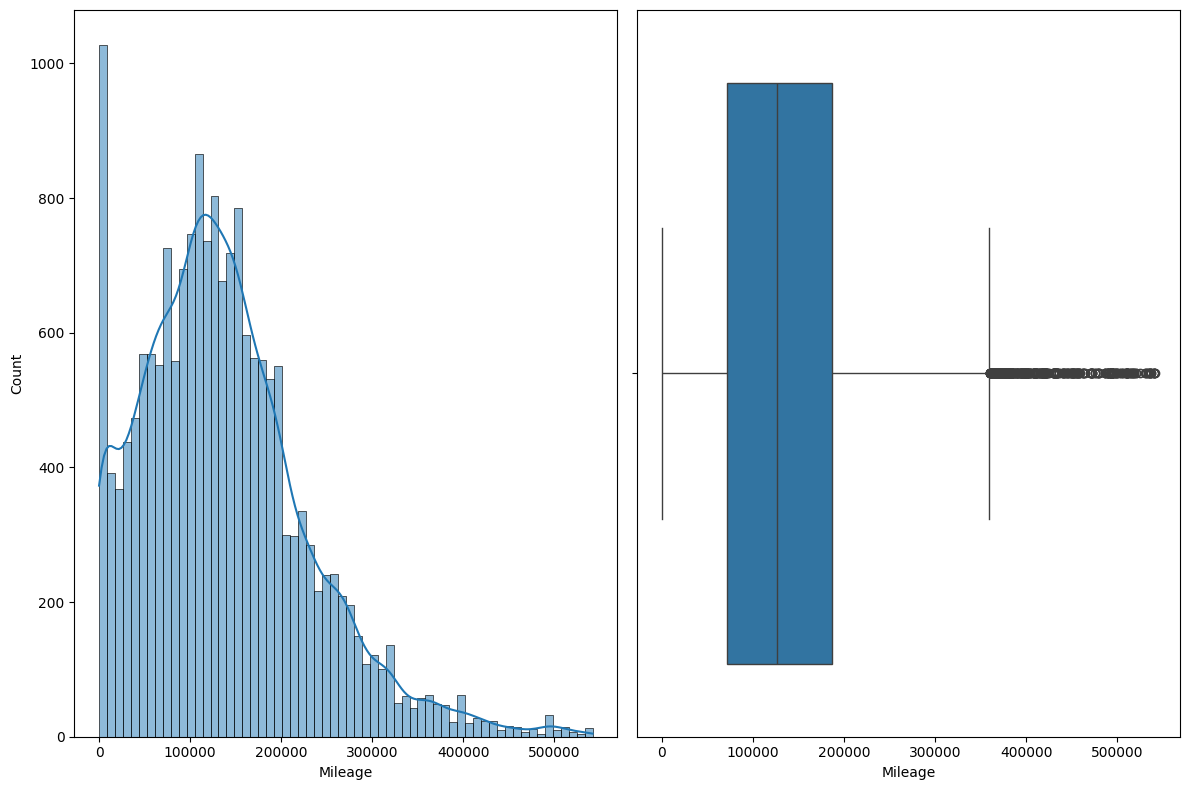

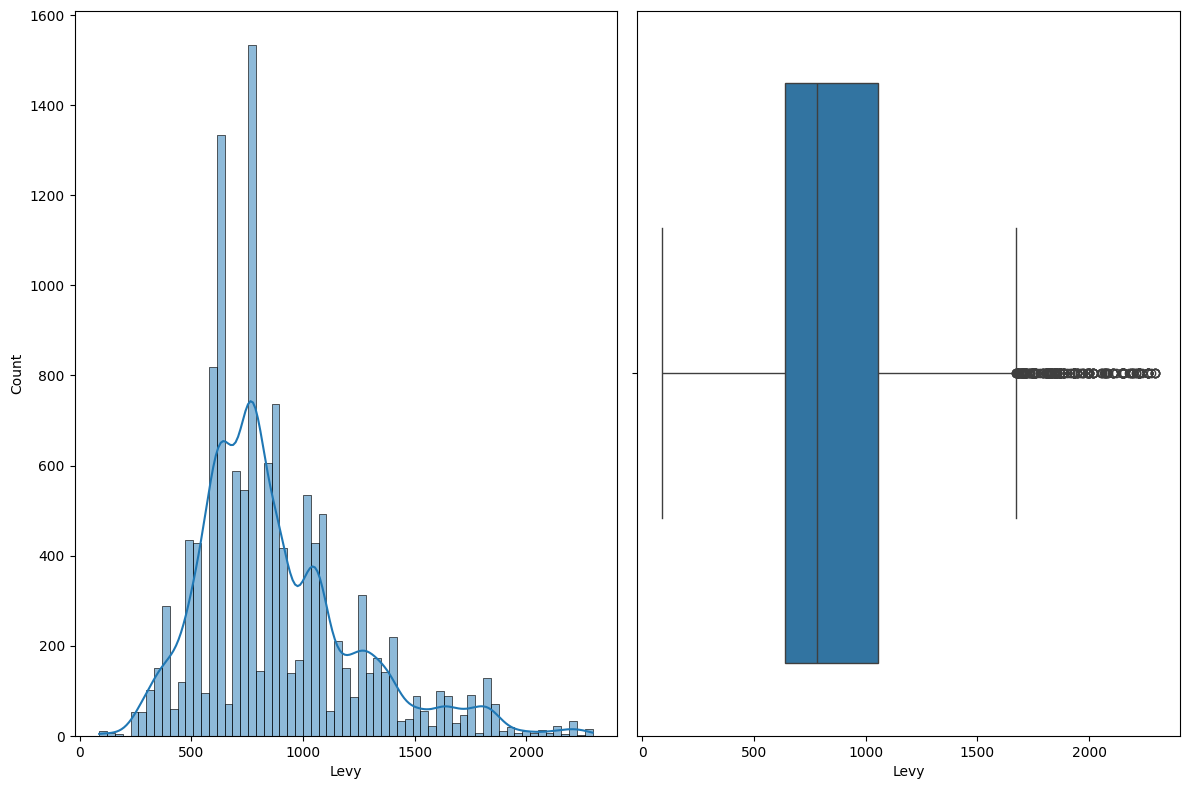

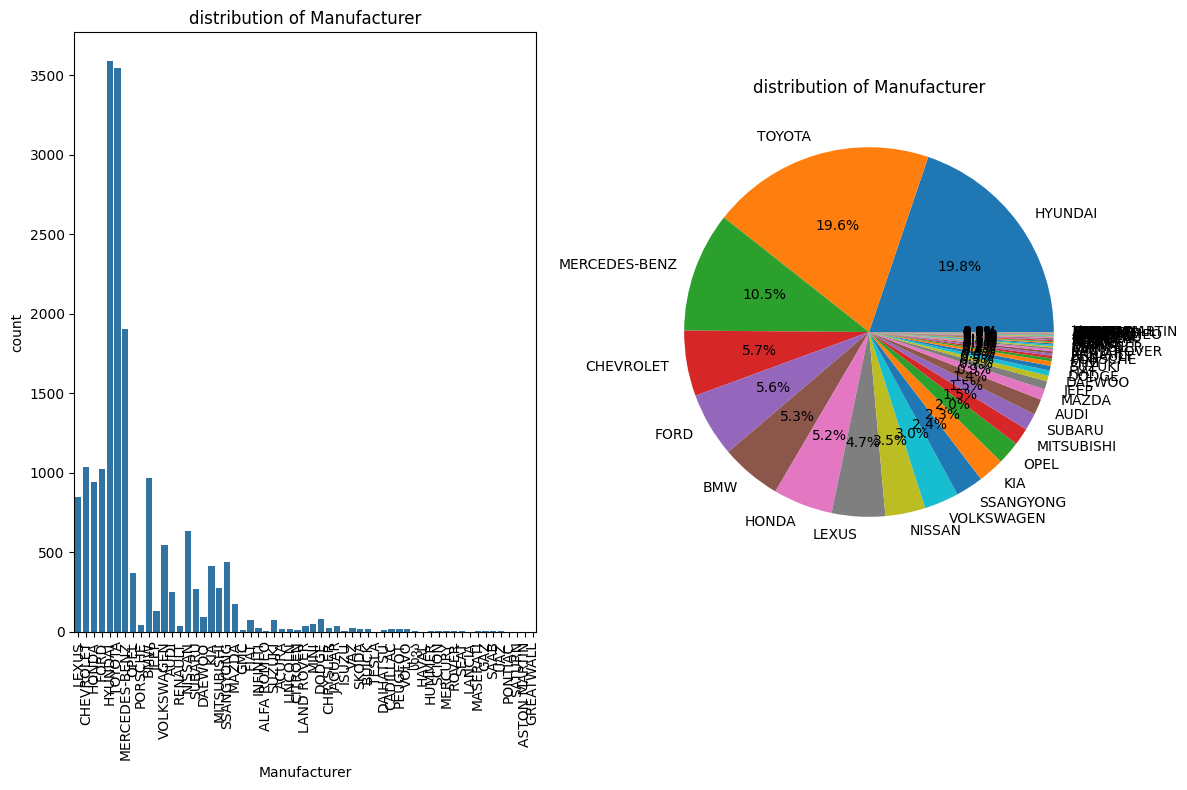

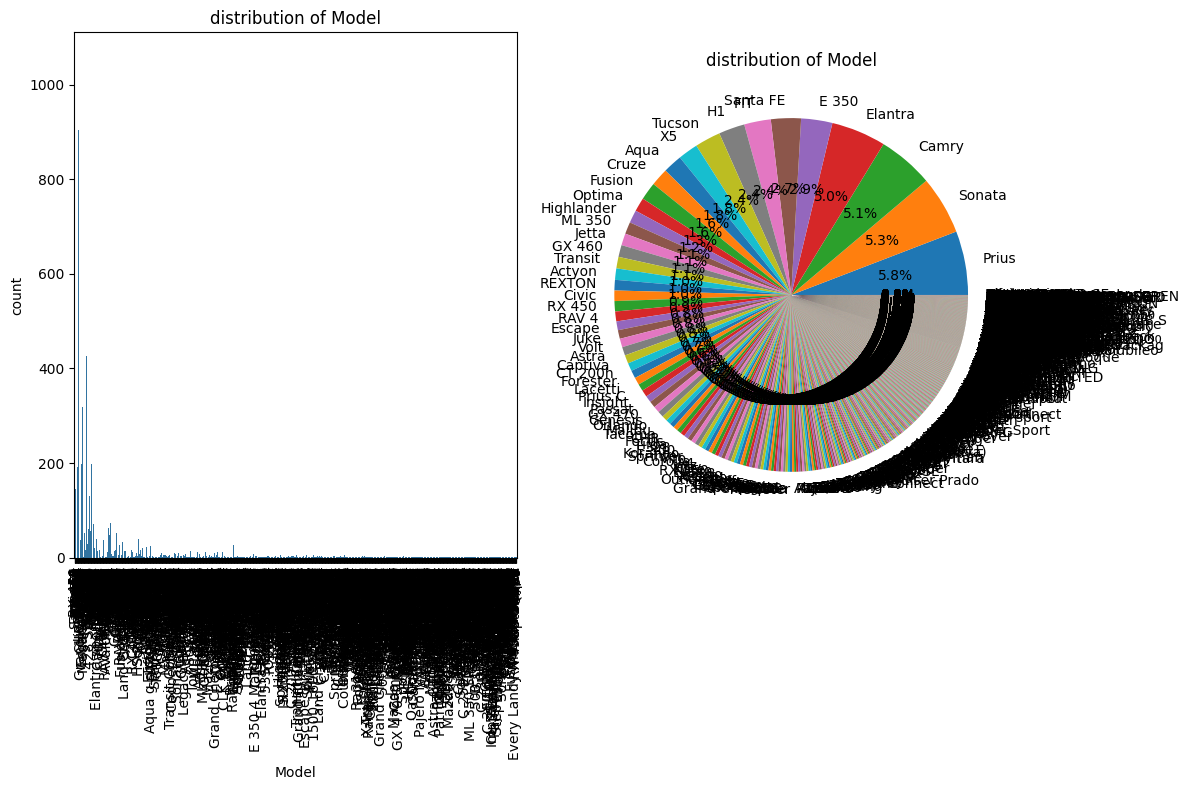

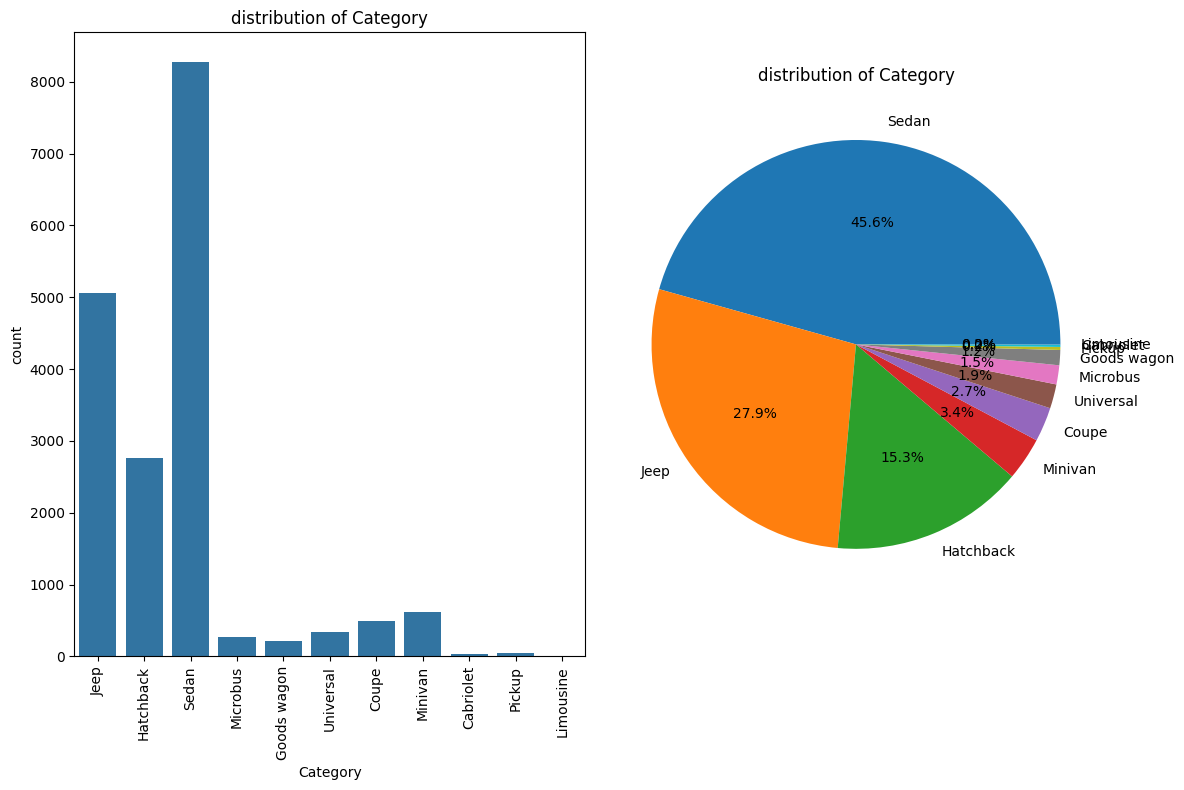

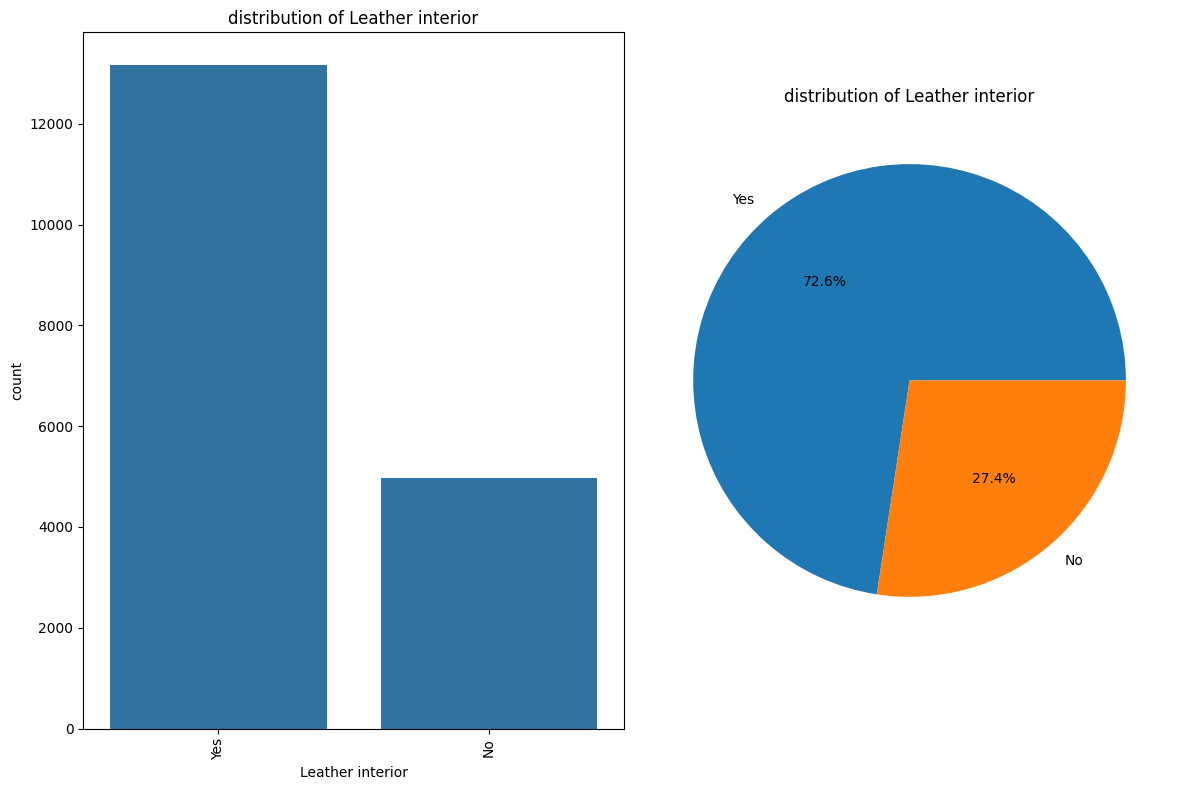

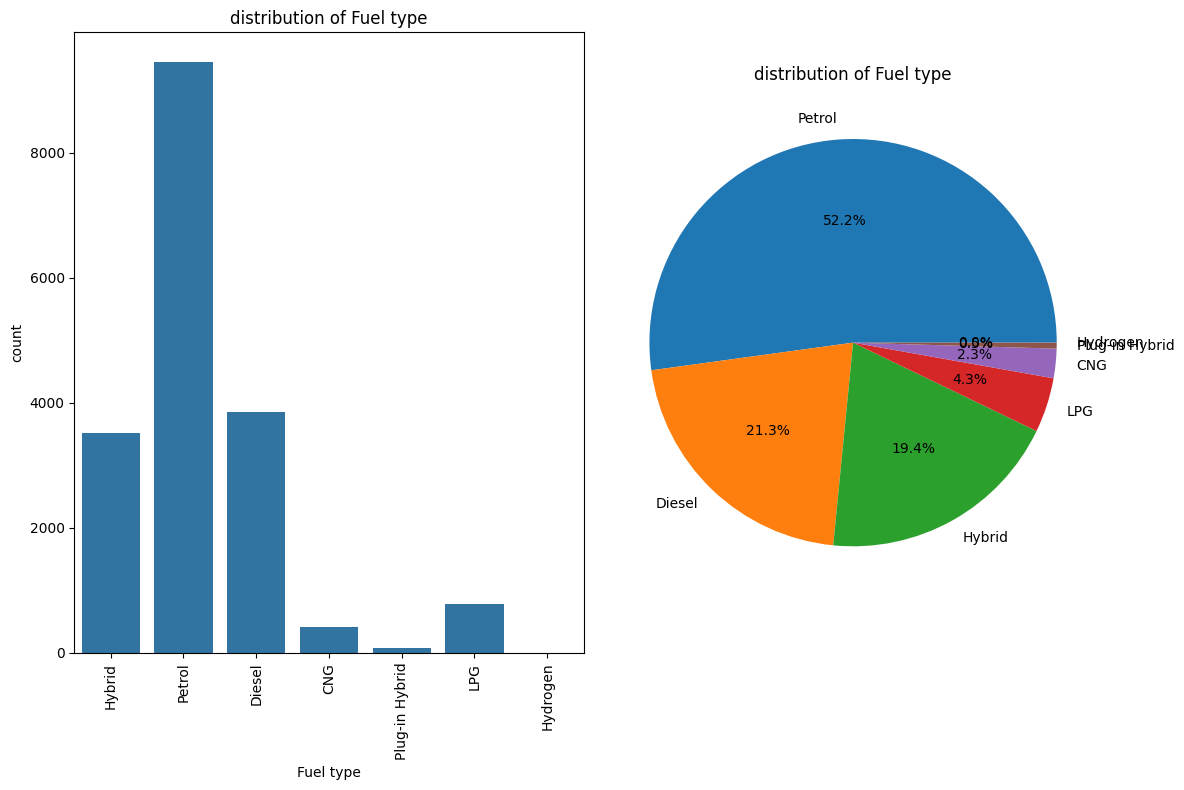

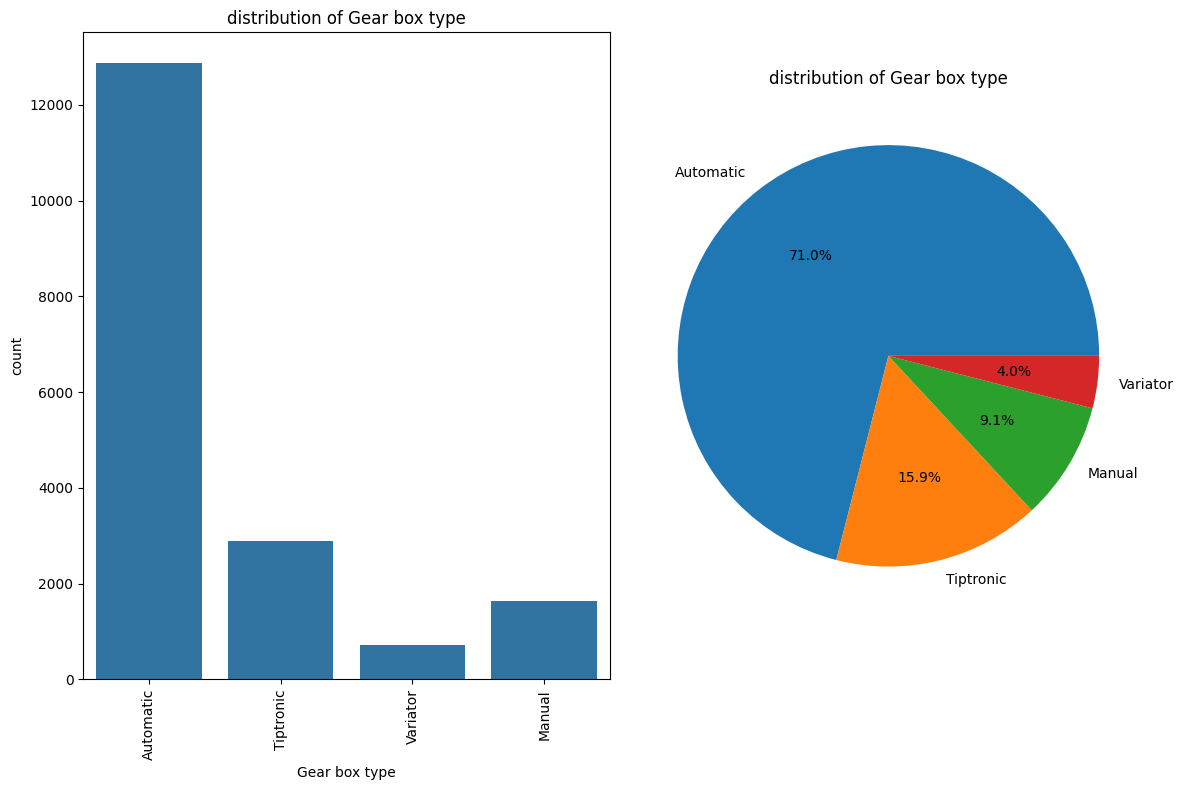

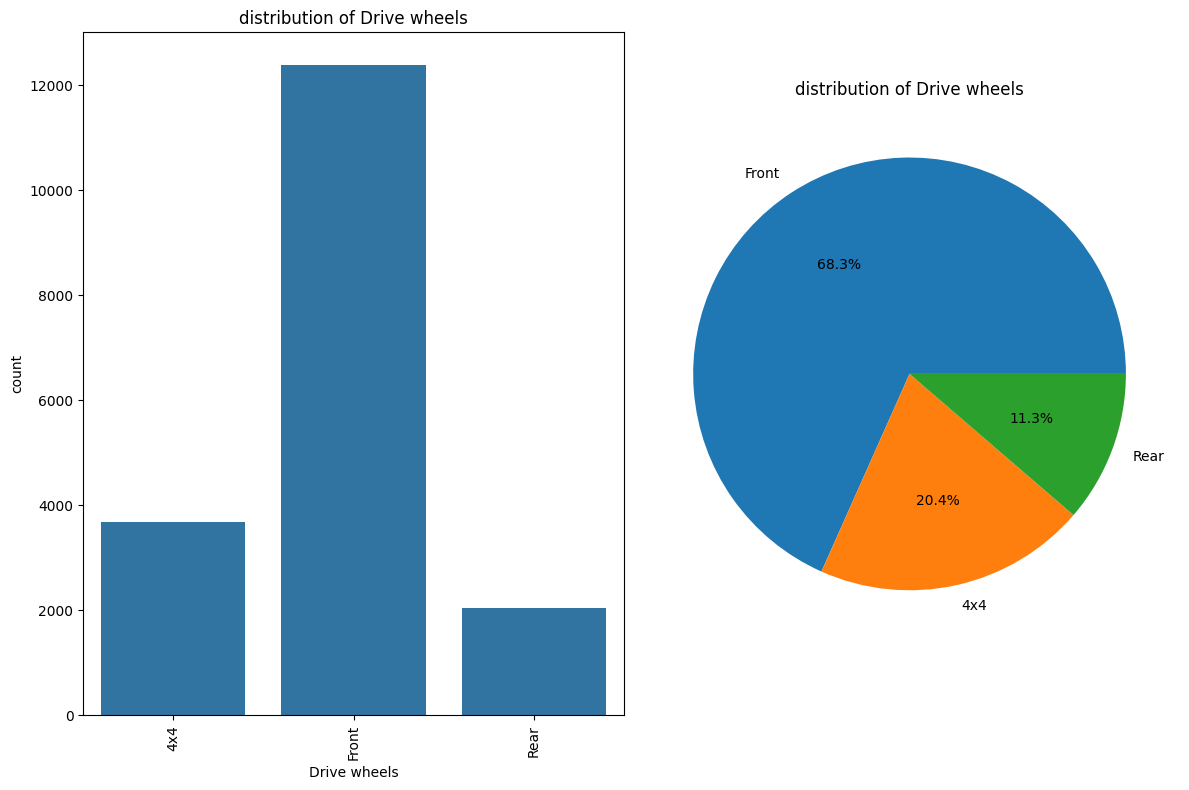

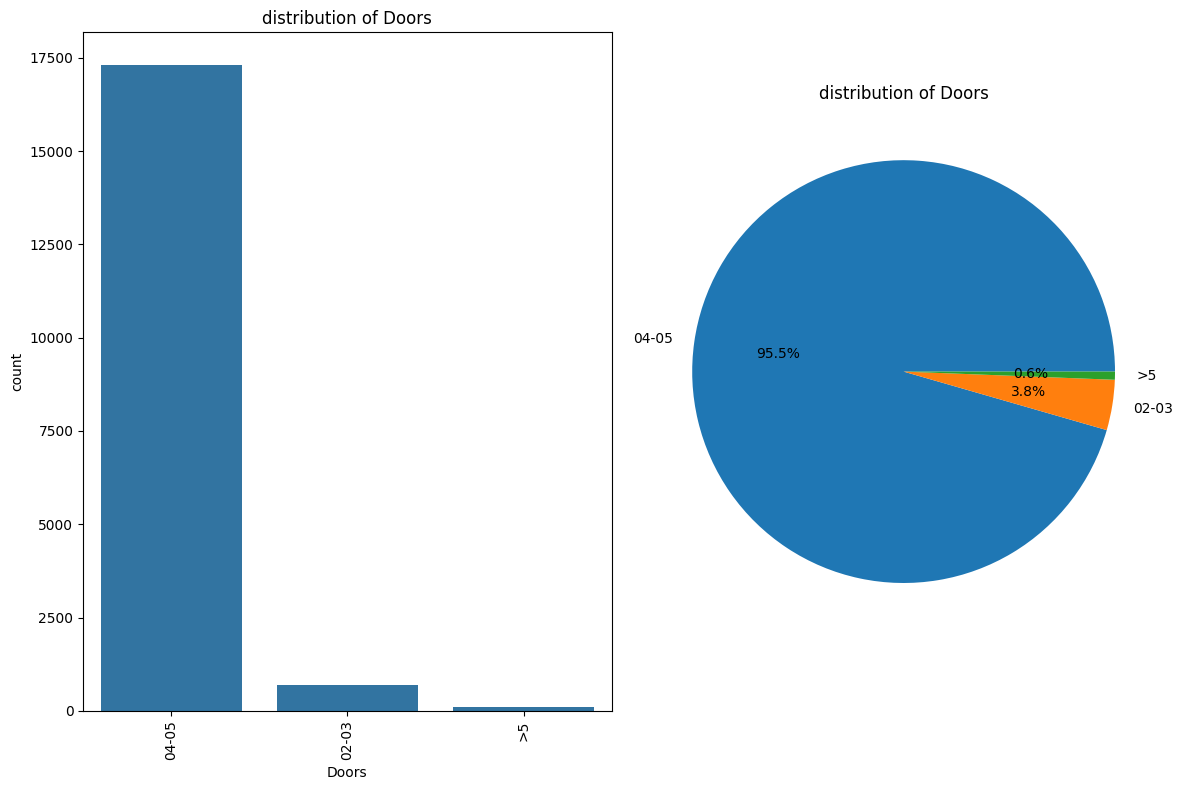

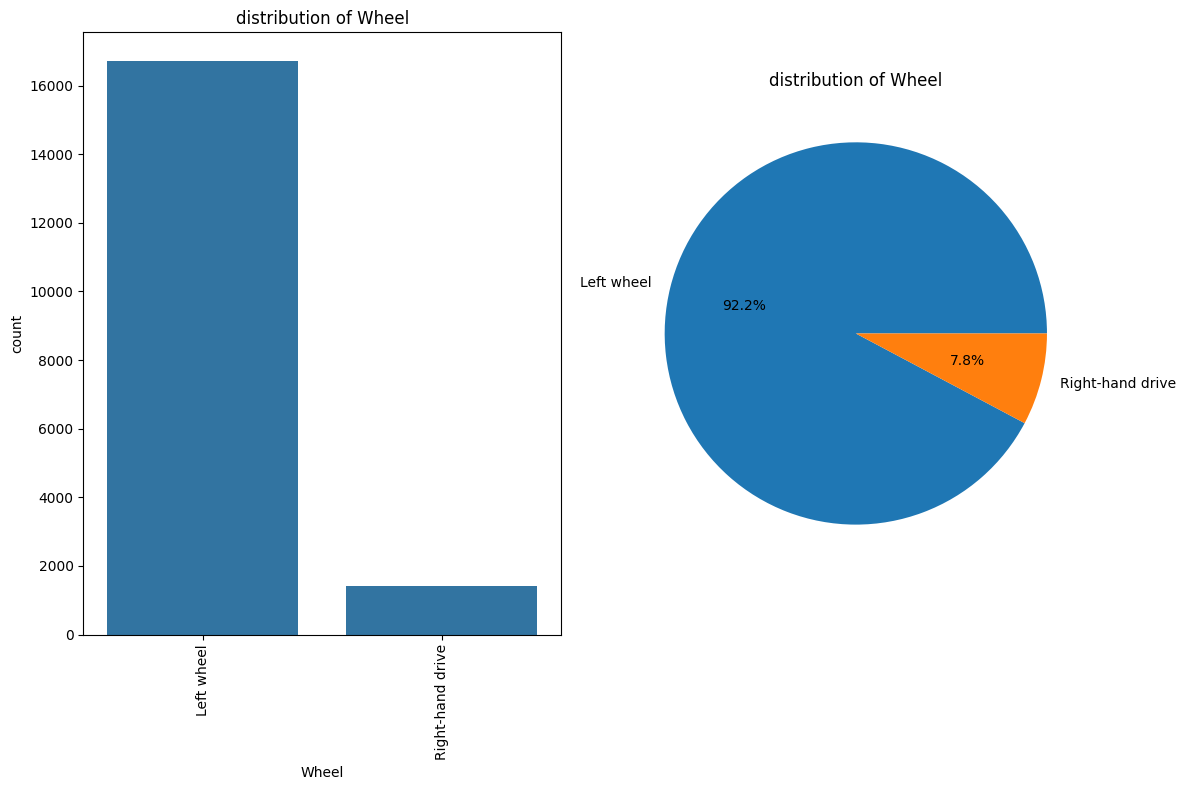

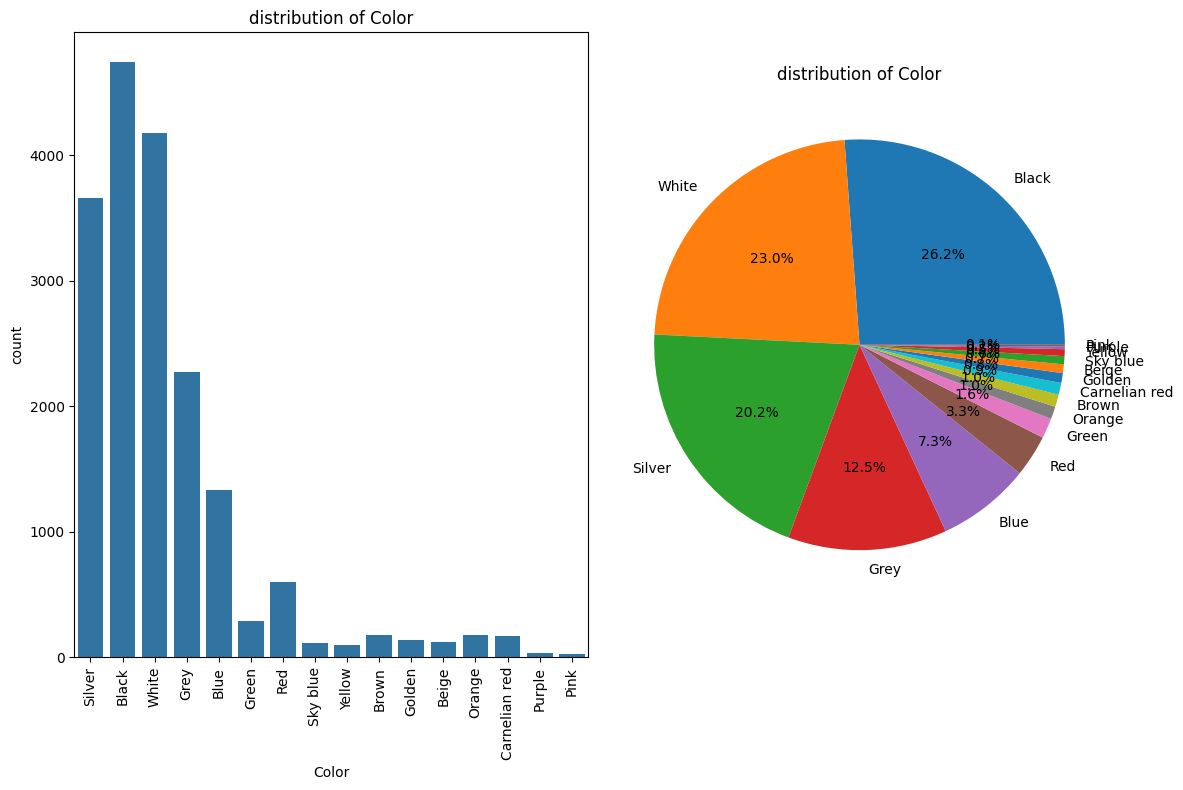

In [15]:
num_col= ['Price',  'Prod. year','Cylinders','Airbags', 'Engine volume', 'Mileage','Levy']
cat_col=[  'Manufacturer', 'Model',
       'Category', 'Leather interior', 'Fuel type',
        'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

for col in num_col:
        fig , ax = plt.subplots(1,2,figsize=(12,8))
        sns.histplot(car_data,x=col,ax=ax[0],kde=True)
        sns.boxplot(data=car_data,x=col,ax=ax[1])
        plt.tight_layout()
        plt.show()

for col in cat_col:
        fig , ax = plt.subplots(1,2,figsize=(12,8))
        sns.countplot(data= car_data, x=col,ax=ax[0])
        ax[0].set_title(f"distribution of {col}")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel("count")
        ax[0].tick_params(axis='x', rotation=90)
        counts= car_data[col].value_counts()
        ax[1].pie(counts,labels=counts.index,autopct='%1.1f%%')
        ax[1].set_title(f"distribution of {col}")
        plt.tight_layout()
        plt.show()
        



### CORRELATION ANALYSIS

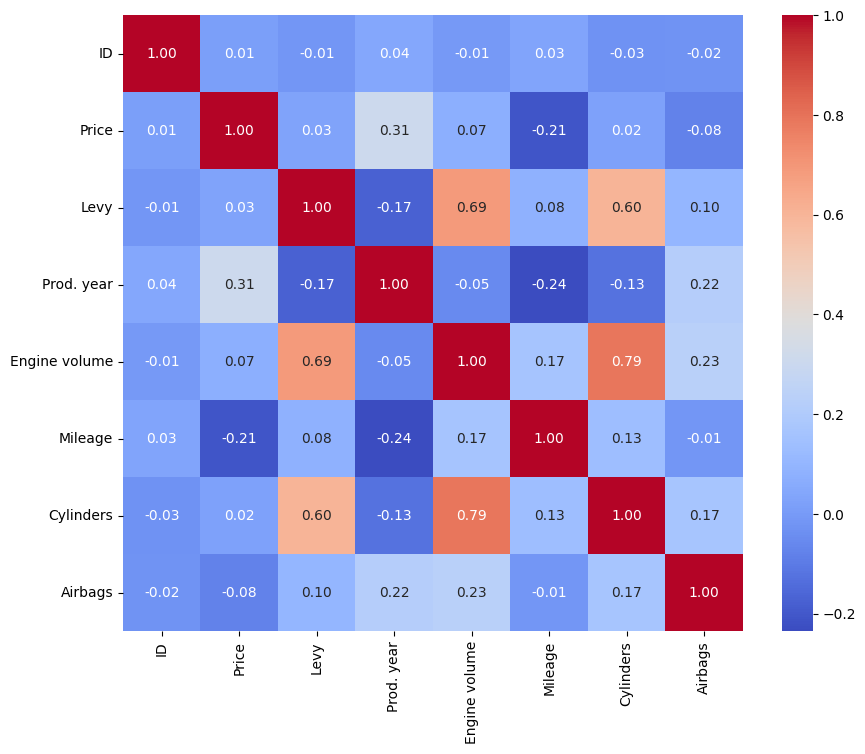

In [16]:


plt.figure(figsize=(10, 8))
sns.heatmap(car_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


### MULTIVARIATE ANALYSIS

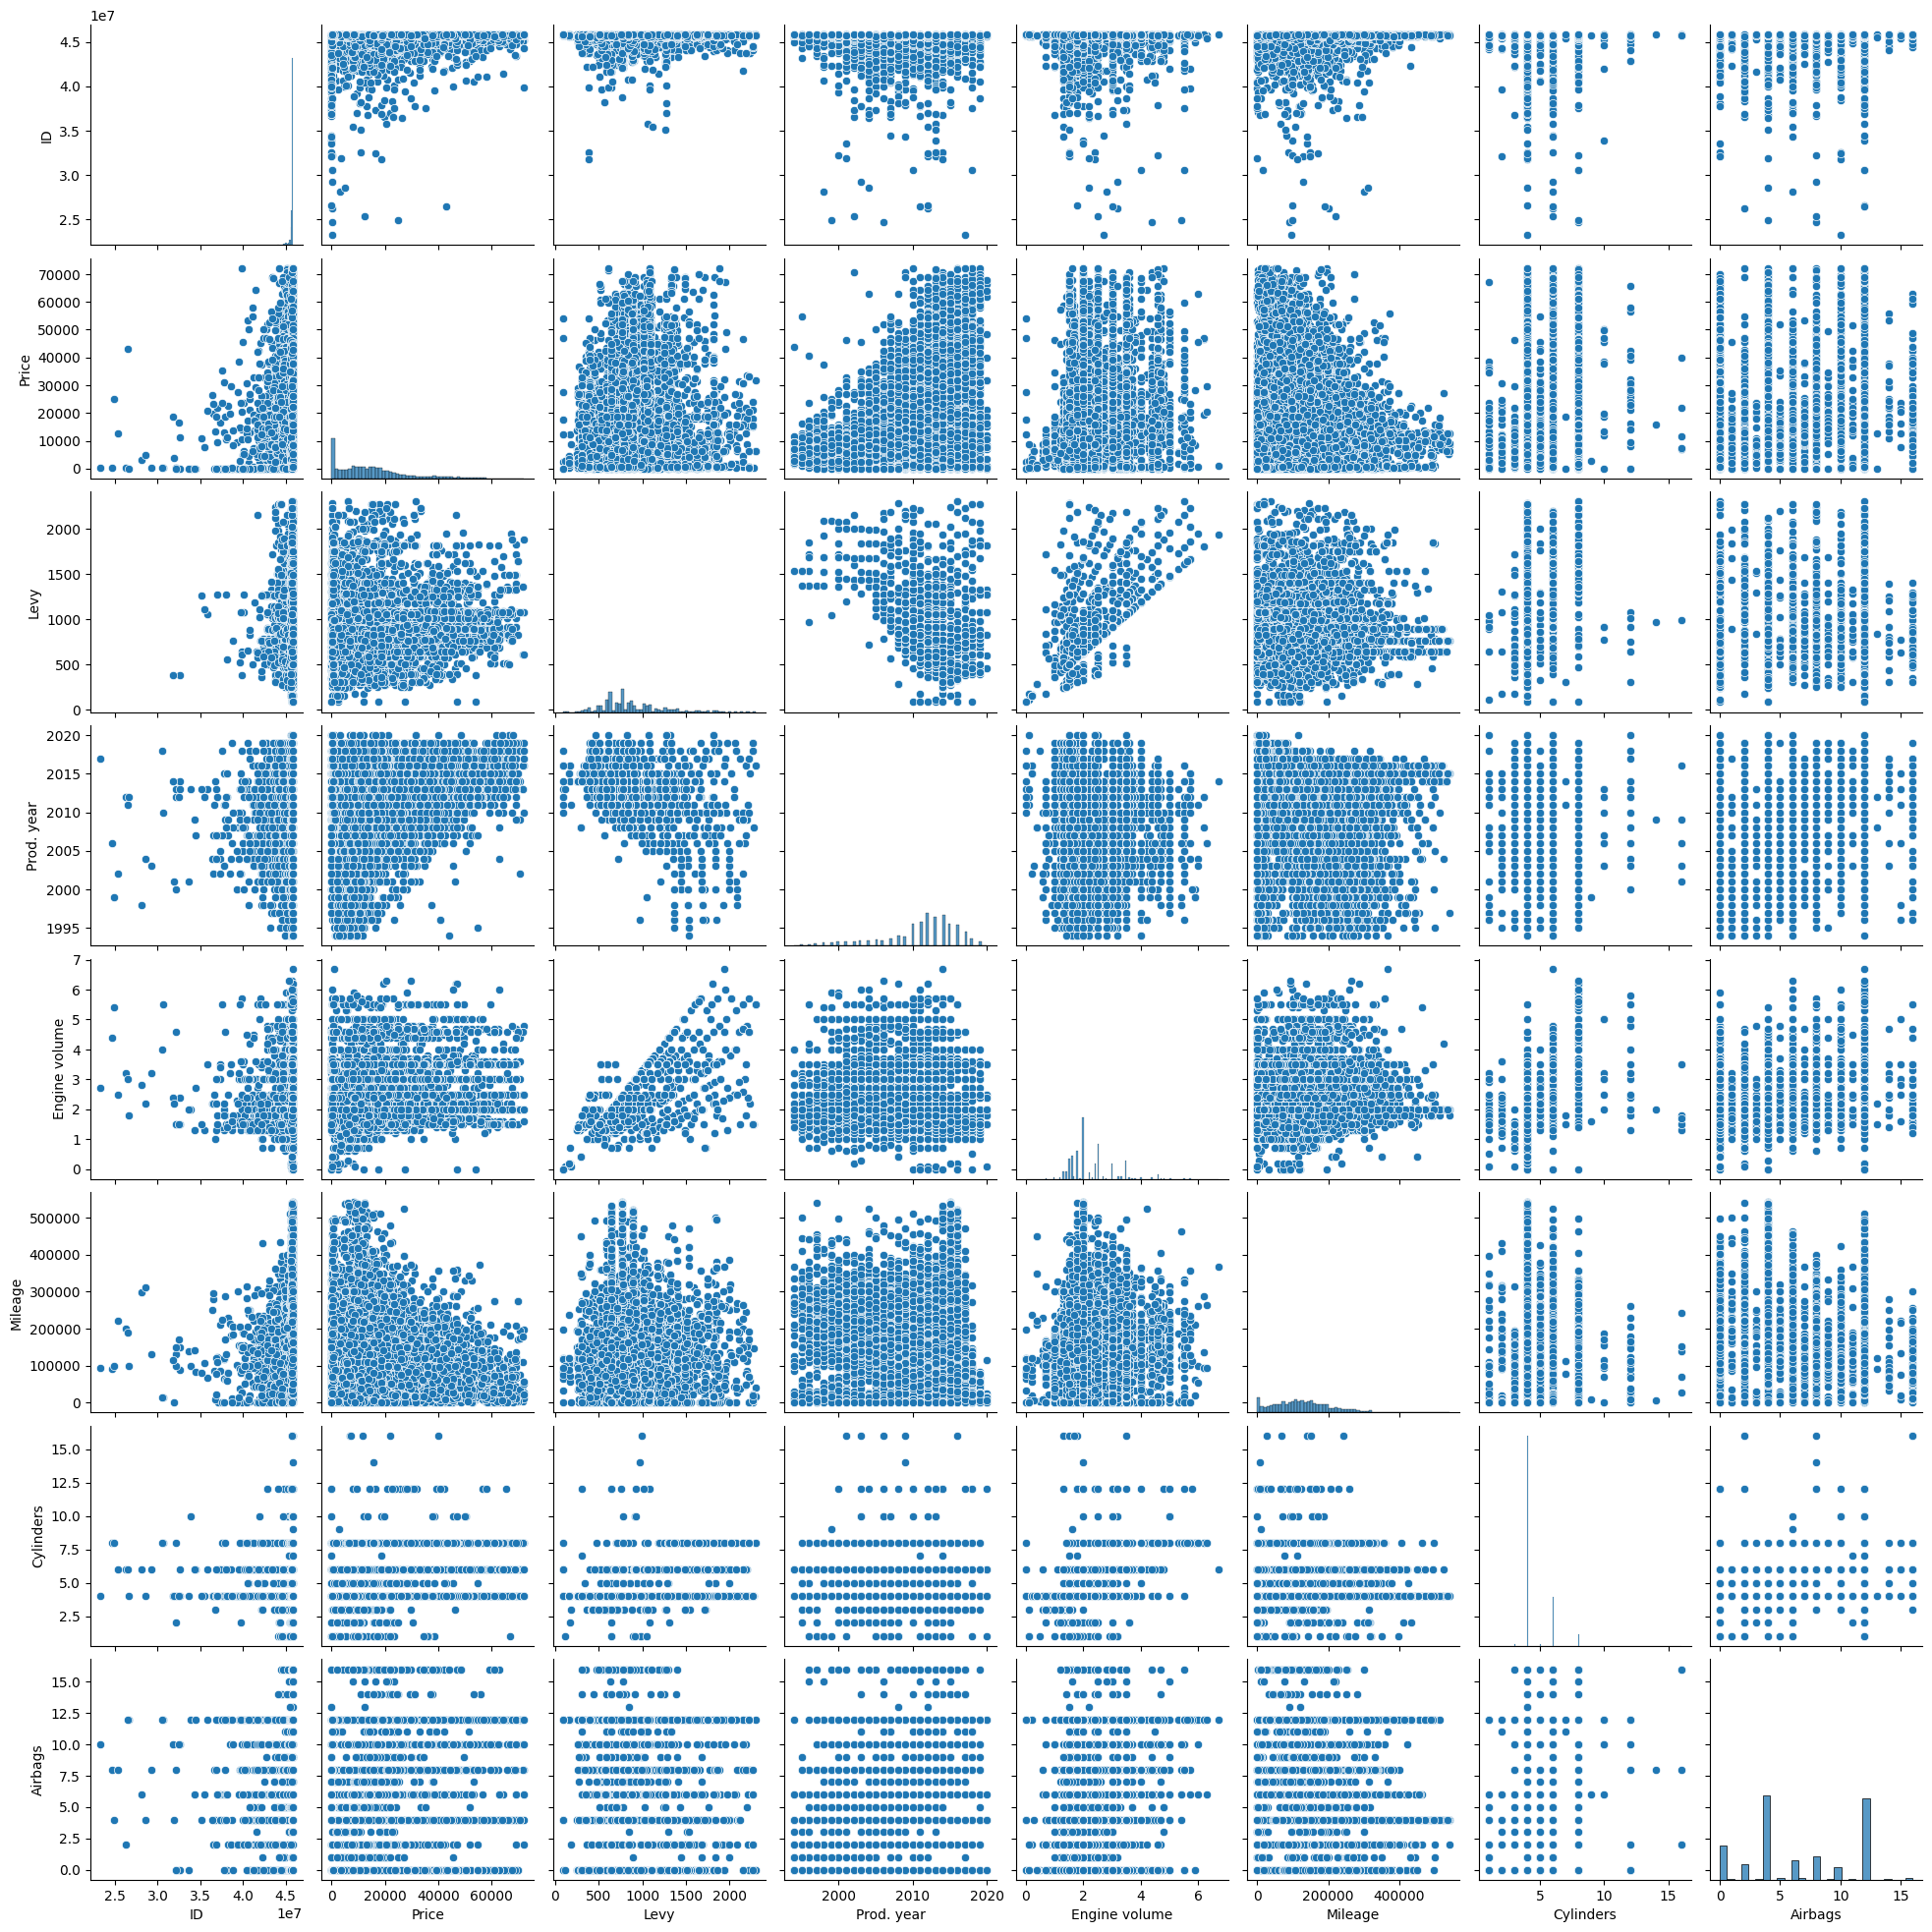

In [17]:
sns.pairplot(car_data)

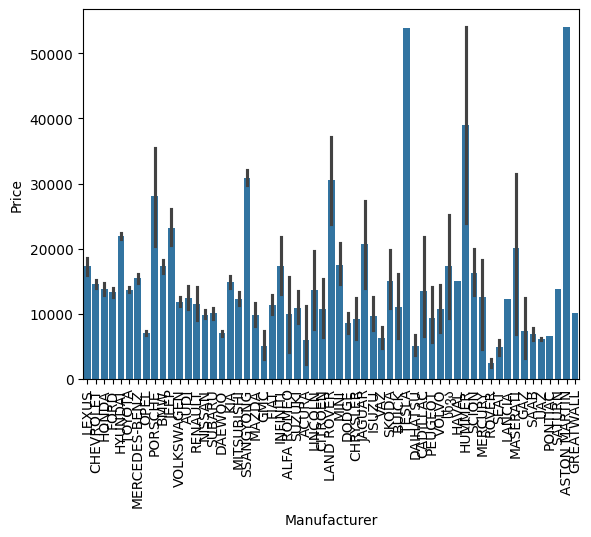

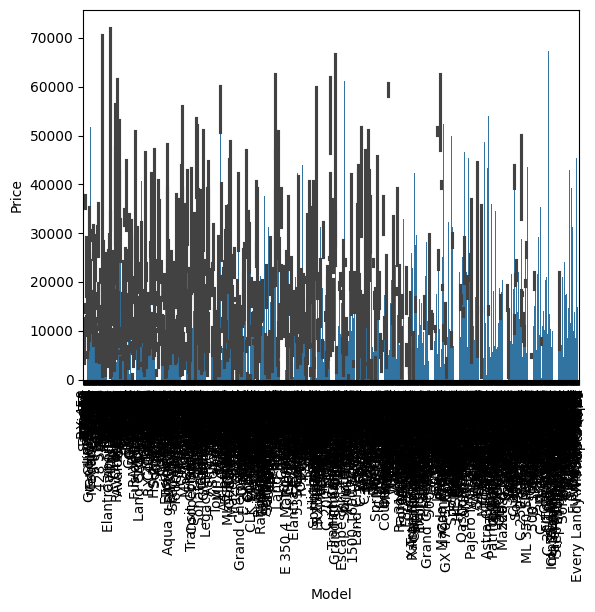

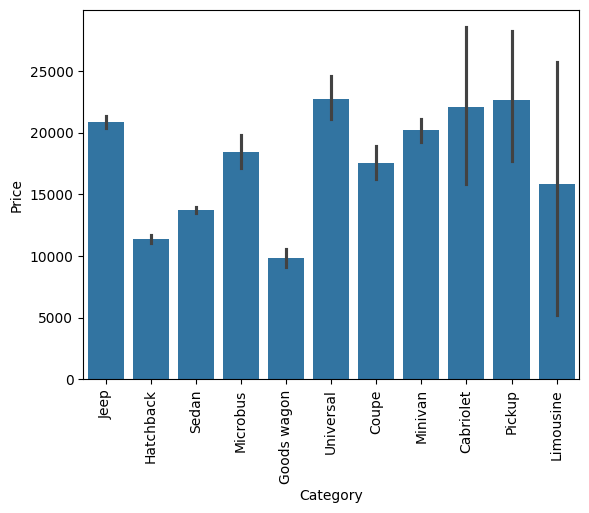

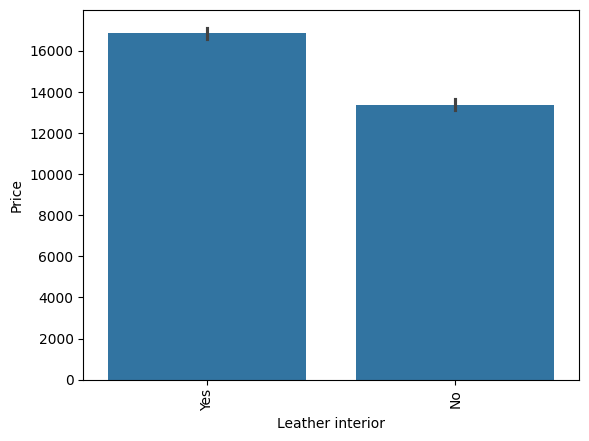

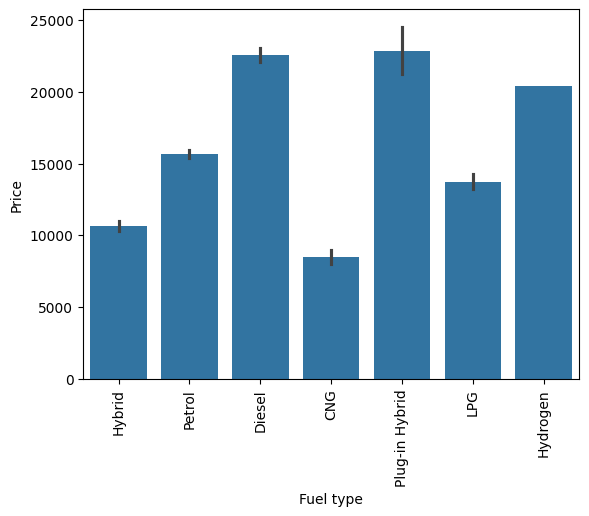

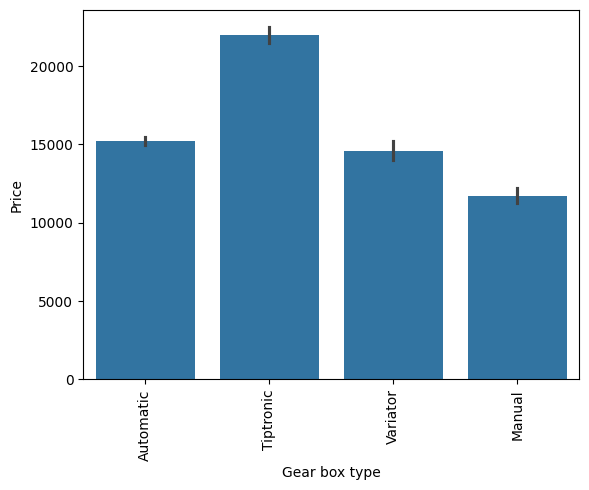

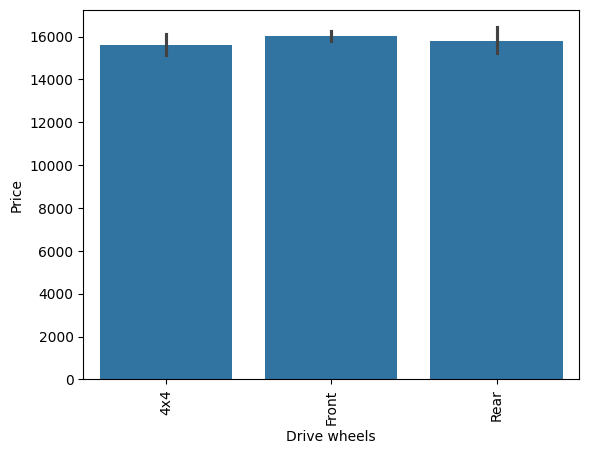

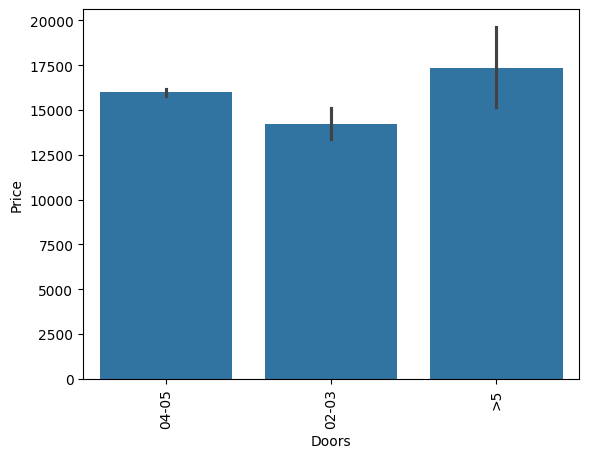

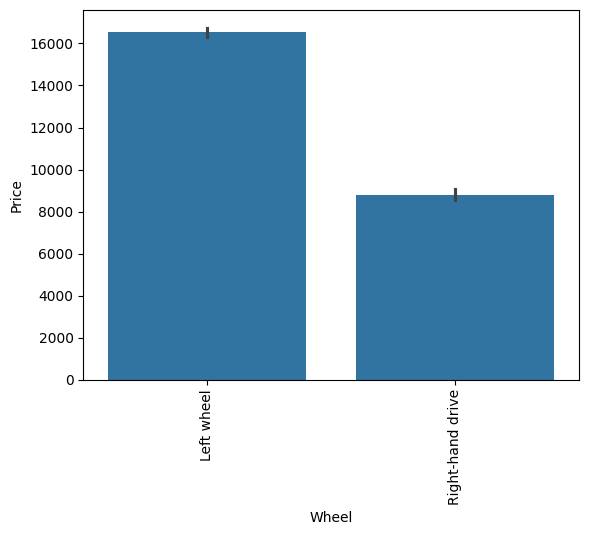

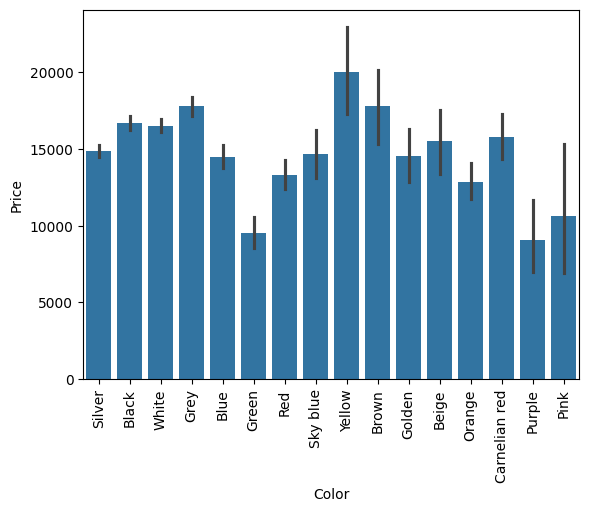

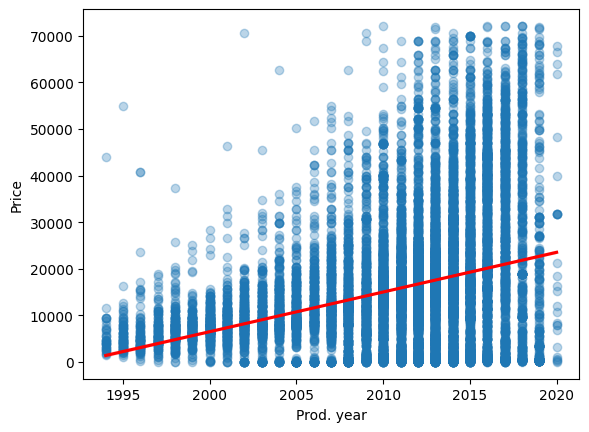

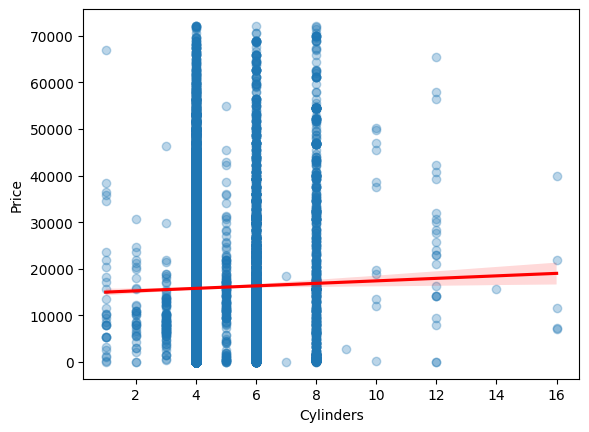

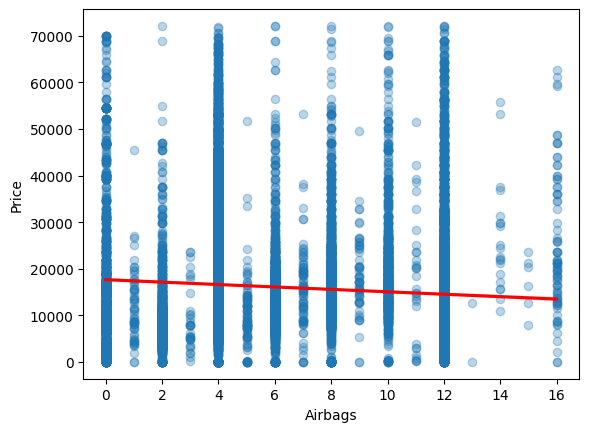

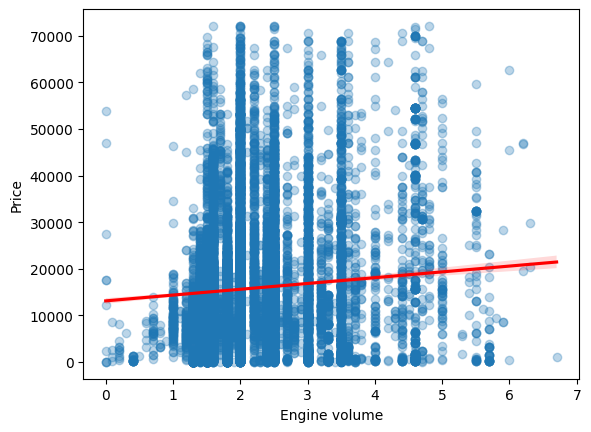

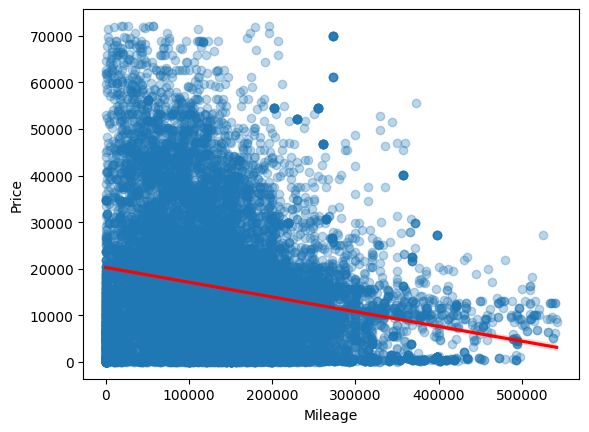

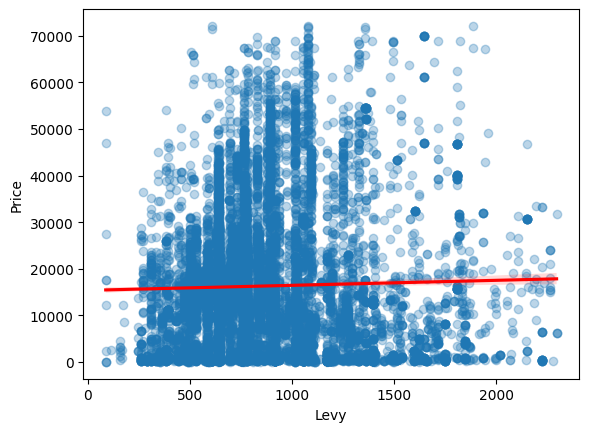

In [18]:
num_col= ['Prod. year','Cylinders','Airbags', 'Engine volume', 'Mileage','Levy']
cat_col=[  'Manufacturer', 'Model',
       'Category', 'Leather interior', 'Fuel type',
        'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

##  plot with mean value of price under that category
for col in cat_col:
        sns.barplot(data= car_data, x= col, y= 'Price', estimator= "mean")
        plt.xticks(rotation=90)
        plt.show()

## regression plot of num col
for col in num_col:
        sns.regplot(data= car_data, x= col, y= 'Price',scatter_kws={'alpha':0.3},line_kws={'color':'red'})
        plt.show()

CONCLUSION:
Finally, we have observed that the price and mileage have lots of outliers and most of the data point are scattered too. So, we may apply transformation on them.

Also, Engine volume has outliers with values 20 which is nearly impossible. we know that the Engine volume can not be greater the 7.5 Turbo. 

The prod. year has outliers less than 1980 that you may delete but else are going to be capped to 2000. more intervention needed so far in prod.year. we will see the prod. year and take the action accordingly. 

We will remove the ID from the data as this is not going to contribute in predicting the price.

We may bin the manufacturer and model. We have to deal with Models as it has 1590 unique value. Gemini has suggested to try target encoder to it. we will try this in featuren engineering part.

Note: outlier detection is more reliable to domain knowledge than mathematics. don't apply mathematical tools to them unknowingly. go on through domain intutions.

## FEATURE ENGINEERING

In [19]:
car_data["Age"]=2026-car_data["Prod. year"]

In [20]:
car_data["Mileage_ratio"]=car_data["Mileage"]/car_data["Age"]

### MISSING VALUES IMPUTATION

We will apply KNN imputer for Levy as it depends on Prod. year, Engine Volume, Cylinders and lit bit on mileage.

In [21]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values=np.nan,n_neighbors=5,weights='distance',metric='nan_euclidean')

### TRANSFORMATIONS

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [23]:
pt = PowerTransformer(method='yeo-johnson')
pipe_pt_std = Pipeline(steps=[('pt', pt), ('scaler', StandardScaler())])
pipe_knn_std= Pipeline(steps=[('scaler', StandardScaler()),('knn_imputer', knn_imputer)])
ohe1=OneHotEncoder(handle_unknown="infrequent_if_exist",min_frequency=0.0025,sparse_output=False)

In [24]:
CT=ColumnTransformer(transformers=[
('ohe',OneHotEncoder(handle_unknown='ignore'),['Category','Fuel type','Color','Gear box type','Drive wheels','Wheel','Doors']),
('pt_std',pt,['Mileage']),('std',StandardScaler(),['Airbags']),
('ode',OrdinalEncoder(),['Leather interior']),('ohe1',ohe1,['Manufacturer']),

('knn_std',pipe_knn_std,['Levy','Prod. year','Cylinders','Engine volume'])
],remainder='passthrough')

#('target_encoder',TargetEncoder(),['Model']),

### Feature selection

We have tried target encoding to model as suggested by Gemini. Apllying target encoding to Model column had just increased the number of columns and showed very few contribution in predicting the price of the car. Also large no of columns had just slowed the Models learning. So, we finally concluded to drop the column Model.

In [25]:
car_data.drop(columns=['ID','Model'],inplace=True)

## MODEL SELECTION

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

In [27]:
X=car_data.iloc[:,1:]
Y=car_data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

APPLY TRANSFORMED TARGET REGRESSOR TO APPLY LOG TRANSFORMATION TO PRICE , RUN THE MODEL TO PREDICT THE PRICE AND THEN EXPONENTIAL THE PREDICTIONS TO GET THE ACTUAL PRICE.

In [28]:
regressors=[('LinearRegression', LinearRegression()),
 ('SVR', SVR()), ('DecisionTreeRegressor', DecisionTreeRegressor()),
  ('RandomForestRegressor', RandomForestRegressor())]

pipelines_TTR={}
for name, regressor in regressors:
    wrapped_regressor=TransformedTargetRegressor(regressor=regressor, 
                                                 func=np.log1p, 
                                                 inverse_func=np.expm1)
    pipelines_TTR[name]=Pipeline([('CT', CT), ('regressor', wrapped_regressor)])


In [29]:
regressors=[('LinearRegression', LinearRegression()),
 ('SVR', SVR()), ('DecisionTreeRegressor', DecisionTreeRegressor()),
  ('RandomForestRegressor', RandomForestRegressor(n_estimators=200))]

pipelines={}
for name, regressor in regressors:
    pipelines[name]=Pipeline([('CT', CT), ('regressor', regressor)])


### Linear Regression

##### Scores over Test data

In [30]:
pipelines['LinearRegression'].fit(X_train, Y_train)
Y_pred=pipelines['LinearRegression'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 11077.642696932806
MSE: 122714167.72090875
R2: 0.37180563484881546
MAE: 8229.317581875053


##### Scores over train data

In [31]:
Y_pred=pipelines['LinearRegression'].predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 11162.638552733857
MSE: 124604499.4589802
R2: 0.3653920887865415
MAE: 8239.450315355973


#### Linear Regression with Transformed Target Regressor

##### Scores over Test data

In [32]:
pipelines_TTR['LinearRegression'].fit(X_train, Y_train)
Y_pred=pipelines_TTR['LinearRegression'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 13460.718984370647
MSE: 181190955.57619637
R2: 0.0724531696438232
MAE: 9174.317390105742


##### Scores over Train data

In [33]:
Y_pred=pipelines_TTR['LinearRegression'].predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 13385.623425222911
MSE: 179174914.48187634
R2: 0.08746619331651373
MAE: 9034.70497666385


### Support Vector Regressor

##### Scores over Test data

In [34]:
pipelines['SVR'].fit(X_train, Y_train)
Y_pred=pipelines['SVR'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 14273.917063435198
MSE: 203744708.33382648
R2: -0.043003265896522036
MAE: 10441.421362960755


##### Scores over Train data

In [35]:
pipelines['SVR'].fit(X_train, Y_train)
Y_pred=pipelines['SVR'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 14273.917063435198
MSE: 203744708.33382648
R2: -0.043003265896522036
MAE: 10441.421362960755


#### Support Vector Regressor with Transformed Target Regressor

##### Scores over Test data

In [36]:
pipelines_TTR['SVR'].fit(X_train, Y_train)
Y_pred=pipelines_TTR['SVR'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 14188.183273546249
MSE: 201304544.60373753
R2: -0.030511659313861905
MAE: 10250.307725984641


##### Scores over Train data

In [37]:
Y_pred=pipelines_TTR['SVR'].predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 14038.818498337037
MSE: 197088424.82925022
R2: -0.003766911694994768
MAE: 10126.559052008595


### Random Forest Regressor

##### Scores over Test data

In [38]:
pipelines['RandomForestRegressor'].fit(X_train, Y_train)
Y_pred=pipelines['RandomForestRegressor'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)


RMSE: 6842.880539574347
MSE: 46825014.0788853
R2: 0.7602949150958656
MAE: 3941.2044810689185


##### Scores over Train data

In [39]:
Y_pred=pipelines['RandomForestRegressor'].predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 2913.7699602483835
MSE: 8490055.381245866
R2: 0.9567603390329199
MAE: 1556.0165893482479


#### Random Forest Regressor with Transformed Target Regressor

##### Scores over Test data

In [40]:
pipelines_TTR['RandomForestRegressor'].fit(X_train, Y_train)
Y_pred=pipelines_TTR['RandomForestRegressor'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)


RMSE: 7991.461446510009
MSE: 63863456.051055856
R2: 0.6730722786500392
MAE: 4451.181711426576


##### Scores over Train data

In [41]:
Y_pred=pipelines_TTR['RandomForestRegressor'].predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 4366.916972725533
MSE: 19069963.846678335
R2: 0.9028771033453677
MAE: 1991.6951852487837


### Decision Tree Regressor

##### Scores over Test data

In [42]:
pipelines['DecisionTreeRegressor'].fit(X_train, Y_train)
Y_pred=pipelines['DecisionTreeRegressor'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 9274.952744901708
MSE: 86024748.42015973
R2: 0.5596249135307878
MAE: 4958.568134227956


##### Scores over Train data

In [43]:
pipelines['DecisionTreeRegressor'].fit(X_train, Y_train)
Y_pred=pipelines['DecisionTreeRegressor'].predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 9310.96375450403
MSE: 86694046.03768778
R2: 0.5561986669958605
MAE: 4999.400658151296


RANDOM FOREST REGRESSOR PERFORM WELL TILL NOW.

### Trying XGboost Regressor

In [44]:
pipelinexg=Pipeline([('CT', CT), ('regressor', XGBRegressor())])
pipelinexg.fit(X_train,Y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Fuel type',
                                                   'Color', 'Gear box type',
                                                   'Drive wheels', 'Wheel',
                                                   'Doors']),
                                                 ('pt_std', PowerTransformer(),
                                                  ['Mileage']),
                                                 ('std', StandardScaler(),
                                                  ['Airbags']),
                                                 ('ode', OrdinalEncoder(),
                                                  ['Leather interior']),
                                                 ('ohe1',
                                                  OneHotEncoder(han...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

##### Scores over Test data

In [45]:
Y_pred=pipelinexg.predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 7277.00390625
MSE: 52954788.0
R2: 0.7289155721664429
MAE: 4598.037109375


##### Scores over Train data

In [46]:
Y_pred=pipelinexg.predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 4908.55859375
MSE: 24093948.0
R2: 0.8772900700569153
MAE: 3282.20361328125


#### Cross validation score of random forest regressor.

In [47]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(pipelines['RandomForestRegressor'],X_train,Y_train,cv=10,scoring='r2')
print(csv)
print(csv.mean())
print(csv.std())

[0.73510116 0.70363619 0.75136473 0.78741029 0.7424472  0.77696562
 0.79375917 0.75387093 0.74511952 0.76423827]
0.7553913078283899
0.025343430550887548


#### Cross val score of XG boost

In [48]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(pipelinexg,X_train,Y_train,cv=10,scoring='r2')
print(csv)
print(csv.mean())
print(csv.std())

[0.71987677 0.67856419 0.73137218 0.75571334 0.73942471 0.75173986
 0.768534   0.73092258 0.7376138  0.74939322]
0.7363154649734497
0.023438354397858685


CONCLUSION:

WE HAVE FOUND TWO MODELS THAT PERFORMED REALLY WELL ON OUR CAR_DATA DATASET. THESE ARE FOLLOWING:

1. RANDOM FOREST REGRESSOR with cross val score mean (0.755)
2. XG BOOST REGRESSOR with corss val score mean (0.736)

## HYPERPARAMETER TUNING OF BEST PERFORMED MODEL TILL NOW

### Random Forest Regressor

In [119]:
pipelines['RandomForestRegressor'][1]

RandomForestRegressor(n_estimators=200)

In [133]:
params={"regressor__n_estimators":[450,500],
"regressor__max_depth":[24,36,42],
"regressor__min_samples_leaf":[2]}

In [134]:
gridsearch=GridSearchCV(pipelines['RandomForestRegressor'],param_grid=params,cv=5,scoring='r2',verbose=2).fit(X_train,Y_train)
gridsearch

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=450; total time=  35.4s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=450; total time=  35.3s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=450; total time=  36.0s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=450; total time=  32.8s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=450; total time=  32.2s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=500; total time=  36.3s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=500; total time=  39.2s
[CV] END regressor__max_depth=24, regressor__min_samples_leaf=2, regressor__n_estimators=500; total time=  36.3s
[CV] END regressor__max_depth=24, re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Category',
                                                                          'Fuel '
                                                                          'type',
                                                                          'Color',
                                                                          'Gear '
                                                                          'box '
                                                                          'type',
                                                                          'Drive '
                                                                          'wheels',
                                                                          'Wheel',
                                                                          'Doors']),
                                                                        ('pt_std',
                                                                         PowerTransformer(),
                                                                         ['Mileage']),
                                                                        ('std',
                                                                         StandardScaler(),
                                                                         ['Airbags']),
                                                                        ('ode',
                                                                         OrdinalEncoder(),
                                                                         ['Leather '...
                                                                        ('knn_std',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('knn_imputer',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Levy',
                                                                          'Prod. '
                                                                          'year',
                                                                          'Cylinders',
                                                                          'Engine '
                                                                          'volume'])])),
                                       ('regressor',
                                        RandomForestRegressor(n_estimators=200))]),
             param_grid={'regressor__max_depth': [24, 36, 42],
                         'regressor__min_samples_leaf': [2],
                         'regressor__n_estimators': [450, 500]},
             scoring='r2', verbose=2)

In [135]:
gridsearch.best_params_

{'regressor__max_depth': 42,
 'regressor__min_samples_leaf': 2,
 'regressor__n_estimators': 500}

In [136]:
Y_pred=gridsearch.predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 6917.5612686303575
MSE: 47852653.90525484
R2: 0.7550342548125436
MAE: 4037.022539785671


In [137]:
Y_pred=gridsearch.predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 3803.92341136482
MSE: 14469833.319529368
R2: 0.9263054645828711
MAE: 2103.801159563213


### XGboost Regressor

In [125]:
pipelinexg

Pipeline(steps=[('CT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Fuel type',
                                                   'Color', 'Gear box type',
                                                   'Drive wheels', 'Wheel',
                                                   'Doors']),
                                                 ('pt_std', PowerTransformer(),
                                                  ['Mileage']),
                                                 ('std', StandardScaler(),
                                                  ['Airbags']),
                                                 ('ode', OrdinalEncoder(),
                                                  ['Leather interior']),
                                                 ('ohe1',
                                                  OneHotEncoder(han...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [49]:
params={"regressor__learning_rate":[0.1,0.2],
"regressor__max_depth":[5,8],
"regressor__min_child_weight":[2,3],
"regressor__reg_lambda":[0.5,1,2]}


gridsearchXG=GridSearchCV(pipelinexg,param_grid=params,cv=5,scoring='r2',verbose=2).fit(X_train,Y_train)
gridsearchXG

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=0.5; total time=   3.1s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=0.5; total time=   3.1s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=0.5; total time=   3.1s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=0.5; total time=   3.1s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=0.5; total time=   3.2s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regressor__reg_lambda=1; total time=   3.2s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__min_child_weight=2, regres

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Category',
                                                                          'Fuel '
                                                                          'type',
                                                                          'Color',
                                                                          'Gear '
                                                                          'box '
                                                                          'type',
                                                                          'Drive '
                                                                          'wheels',
                                                                          'Wheel',
                                                                          'Doors']),
                                                                        ('pt_std',
                                                                         PowerTransformer(),
                                                                         ['Mileage']),
                                                                        ('std',
                                                                         StandardScaler(),
                                                                         ['Airbags']),
                                                                        ('ode',
                                                                         OrdinalEncoder(),
                                                                         ['Leather '...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             param_grid={'regressor__learning_rate': [0.1, 0.2],
                         'regressor__max_depth': [5, 8],
                         'regressor__min_child_weight': [2, 3],
                         'regressor__reg_lambda': [0.5, 1, 2]},
             scoring='r2', verbose=2)

In [50]:
Y_pred=gridsearchXG.predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

RMSE: 7057.88818359375
MSE: 49813784.0
R2: 0.7449948787689209
MAE: 4349.7158203125


In [51]:
Y_pred=gridsearchXG.predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred)
print('RMSE:', rmse)

mse = mean_squared_error(Y_train, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_train, Y_pred)
print('R2:', r2)

mae = mean_absolute_error(Y_train, Y_pred)
print('MAE:', mae)

RMSE: 4004.484375
MSE: 16035895.0
R2: 0.9183295369148254
MAE: 2596.77734375


AT LAST, WE ARE CONCLUDING THE RANDOM FOREST REGRESSOR TO BE THE BEST MODEL TILL NOW FOR CAR PRICE PREDICTION OVER THIS DATASET. ALSO WE HAVE ACHIEVED OUR GOAL OVER METRICS THAT R2 SCORE IS 0.755 (>0.75) AND MAE AS 4037 (<5000). 

## THINGS I CAN DO IN FUTURE ON THIS PROJECT

Any replacement of outlier handling method

Try some other models too which I learn in future.

Do feature engineering if I get anything.

Deploy the model in any website form in future.

### THANK YOU FOR VISITING THIS PROJECT.

I would love to have suggestions from you. You can mail me to amanray8900@gmail.com